In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# step 1 : Reading and understanding the data

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\read\car_price.csv")
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


# Step 2 : Data preprocessing

In [4]:
# filling null value
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [5]:
# make a copy of a dataframe
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [6]:
# remove unwanted column
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [7]:
# renaming car_name as model
df.rename(columns={'car_name': 'model'}, inplace=True)

In [8]:
# seperating manufacturer name and model name from model column   
df['manufacturer'] = df['model'].map(lambda x: str(x).strip().split(" ")[0])
df['model'] = df['model'].map(lambda x: str(x).strip().split(" ")[1])

In [9]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Compass,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep
1,Duster,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault
2,Camry,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota
3,Jazz,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda
4,Polo,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen


In [10]:
df["engine"].value_counts()

1197 cc    714
1248 cc    395
998 cc     346
1498 cc    252
1497 cc    245
          ... 
1173 cc      1
2359 cc      1
5950 cc      1
3956 cc      1
2979 cc      1
Name: engine, Length: 139, dtype: int64

In [11]:
# removing "cc" from engine column 
df["engine"] = [int(df["engine"][i].replace(" cc", "")) for i in range(len(df["engine"]))]

In [12]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Compass,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956,5 Seats,Jeep
1,Duster,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330,5 Seats,Renault
2,Camry,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494,5 Seats,Toyota
3,Jazz,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199,5 Seats,Honda
4,Polo,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199,5 Seats,Volkswagen


In [13]:
# Removing kms from kms_driven and converting into numeric
df["engine"].dtype

dtype('int64')

In [14]:
df['kms_driven'] = df['kms_driven'].map(lambda x: x.rstrip(' kms'))
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(',', ''))
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [15]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Compass,10.03 Lakh,86226,Diesel,Manual,1st Owner,2017,1956,5 Seats,Jeep
1,Duster,12.83 Lakh,13248,Petrol,Automatic,1st Owner,2021,1330,5 Seats,Renault
2,Camry,16.40 Lakh,60343,Petrol,Automatic,1st Owner,2016,2494,5 Seats,Toyota
3,Jazz,7.77 Lakh,26696,Petrol,Automatic,1st Owner,2018,1199,5 Seats,Honda
4,Polo,5.15 Lakh,69414,Petrol,Manual,1st Owner,2016,1199,5 Seats,Volkswagen


In [16]:
# removing seats abbrevation
df['Seats'] = df['Seats'].map(lambda x: x.rstrip(' Seats'))

In [17]:
df.head(2)

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Compass,10.03 Lakh,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep
1,Duster,12.83 Lakh,13248,Petrol,Automatic,1st Owner,2021,1330,5,Renault


In [18]:
# car price column conversion into float 
df["car_prices_in_rupee"].value_counts()

4.50 Lakh     62
3.50 Lakh     62
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     52
              ..
12.03 Lakh     1
15.62 Lakh     1
7.92 Lakh      1
29.25 Lakh     1
31.90 Lakh     1
Name: car_prices_in_rupee, Length: 1300, dtype: int64

In [19]:
df[df["manufacturer"]=='Porsche' ]

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
64,Cayenne,45 Lakh,48894,Diesel,Automatic,1st Owner,2014,4134,5,Porsche
912,Cayenne,58 Lakh,50000,Diesel,Automatic,1st Owner,2016,1197,5,Porsche
1074,Panamera,1.75 Crore,10000,Petrol,Automatic,1st Owner,2019,1950,5,Porsche
3117,Cayenne,58 Lakh,50000,Diesel,Automatic,1st Owner,2016,1499,5,Porsche
3258,Panamera,1.75 Crore,10000,Petrol,Automatic,1st Owner,2019,1061,5,Porsche
3332,Cayenne,22 Lakh,120000,Diesel,Automatic,2nd Owner,2011,1248,5,Porsche
4180,Cayenne,58 Lakh,50000,Diesel,Automatic,1st Owner,2016,1461,5,Porsche
4963,Cayenne,26.71 Lakh,88277,Diesel,Automatic,2nd Owner,2014,1198,5,Porsche
5430,Cayenne,58 Lakh,50000,Diesel,Automatic,1st Owner,2016,1997,5,Porsche
5483,Panamera,1.75 Crore,10000,Petrol,Automatic,1st Owner,2019,3198,7,Porsche


In [20]:
dummy = df["car_prices_in_rupee"]

In [21]:
ls = []
for i in range(len(dummy)):
    if dummy[i][-5:] == " Lakh":
        ls.append(float(dummy[i].replace(" Lakh", "")))
    elif dummy[i][-6:] == " Crore":
        ls.append(float(dummy[i].replace(" Crore", ""))*100)
    else:
        ls.append(float(dummy[i].replace(",","")))

In [22]:
type(ls[4])

float

In [23]:
df["car_prices_in_rupee"] = ls

In [24]:
df["car_prices_in_rupee"].dtype

dtype('float64')

In [25]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Compass,10.03,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep
1,Duster,12.83,13248,Petrol,Automatic,1st Owner,2021,1330,5,Renault
2,Camry,16.40,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota
3,Jazz,7.77,26696,Petrol,Automatic,1st Owner,2018,1199,5,Honda
4,Polo,5.15,69414,Petrol,Manual,1st Owner,2016,1199,5,Volkswagen


In [26]:
df["ownership"].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

In [27]:
# removing owner abbrevation
df["ownership"] = list(map(lambda x: int(x[0]) , df["ownership"]))

In [28]:
# deleting "0th" rows from ownership 
df.drop(df[df["ownership"]==0].index,inplace=True)

In [29]:
df[df["ownership"]==0]

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer


In [30]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Compass,10.03,86226,Diesel,Manual,1,2017,1956,5,Jeep
1,Duster,12.83,13248,Petrol,Automatic,1,2021,1330,5,Renault
2,Camry,16.40,60343,Petrol,Automatic,1,2016,2494,5,Toyota
3,Jazz,7.77,26696,Petrol,Automatic,1,2018,1199,5,Honda
4,Polo,5.15,69414,Petrol,Manual,1,2016,1199,5,Volkswagen


In [31]:
# cheaking Categorical column

In [32]:
df['fuel_type'].value_counts()

Petrol      2961
Diesel      2422
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [33]:
df['transmission'].value_counts()

Manual       3961
Automatic    1544
Name: transmission, dtype: int64

In [34]:
df["manufacturer"].value_counts()

Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     282
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              164
Volkswagen        155
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land               50
Jeep               49
Volvo              31
Jaguar             30
Datsun             25
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: manufacturer, dtype: int64

In [35]:
# seperate top 10 manufacturer and reamining added as "other" catagory
top10mfg = df['manufacturer'].value_counts().head(10)
top10mfg

Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     282
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Name: manufacturer, dtype: int64

In [36]:
top10mfg.index

Index(['Maruti', 'Hyundai', 'Honda', 'Mahindra', 'Mercedes-Benz', 'Tata',
       'Toyota', 'BMW', 'Renault', 'Ford'],
      dtype='object')

In [37]:
df['manufacturer'] = list(map(lambda x:"Other" if x not in top10mfg else x, df['manufacturer']))

In [38]:
df.manufacturer

0         Other
1       Renault
2        Toyota
3         Honda
4         Other
         ...   
5507        BMW
5508        BMW
5509      Other
5510        BMW
5511        BMW
Name: manufacturer, Length: 5505, dtype: object

In [39]:
df['manufacturer'].value_counts()

Maruti           1389
Hyundai          1023
Other             956
Honda             498
Mahindra          315
Mercedes-Benz     282
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Name: manufacturer, dtype: int64

In [40]:
# seperate top 10 model and reamining added as "other" catagory
top10_model = df['model'].value_counts().head(10)
top10_model

Swift    388
i20      237
City     221
Wagon    206
Alto     192
Grand    153
Verna    125
i10      119
Amaze    118
Creta    117
Name: model, dtype: int64

In [41]:
df['model'] = list(map(lambda x:"Other" if x not in top10_model else x, df['model']))

In [42]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Other,10.03,86226,Diesel,Manual,1,2017,1956,5,Other
1,Other,12.83,13248,Petrol,Automatic,1,2021,1330,5,Renault
2,Other,16.40,60343,Petrol,Automatic,1,2016,2494,5,Toyota
3,Other,7.77,26696,Petrol,Automatic,1,2018,1199,5,Honda
4,Other,5.15,69414,Petrol,Manual,1,2016,1199,5,Other


In [43]:
# changing fueltype of LPG and CNG to gas
df['fuel_type'].value_counts()

Petrol      2961
Diesel      2422
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [44]:
# Replace 'lpg' with 'gas' and 'cng' with 'gas' in the 'fuel_type' column
df['fuel_type'] = df['fuel_type'].replace({'Lpg': 'Gas', 'Cng': 'Gas'})
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Gas', 'Electric'], dtype=object)

In [45]:
# Cheaking for outliers
df.describe()

,car_prices_in_rupee,kms_driven,ownership,manufacture,engine
count,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000
mean,1704.612031,63279.978928,1.423615,2015.447593,1532.241235
std,11478.254222,41826.778607,0.701707,3.924087,579.428251
min,1.000000,250.000000,1.000000,1995.000000,0.000000
25%,3.300000,33500.000000,1.000000,2013.000000,1197.000000
50%,5.750000,59176.000000,1.000000,2016.000000,1396.000000
75%,11.360000,84280.000000,2.000000,2018.000000,1950.000000
max,99999.000000,560000.000000,5.000000,2022.000000,5950.000000


<Axes: >

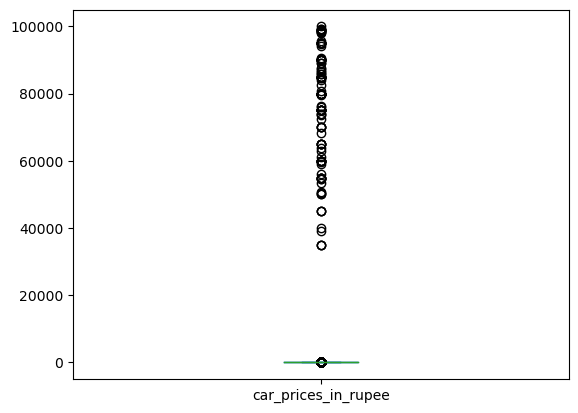

In [46]:
df["car_prices_in_rupee"].plot.box()

In [47]:
# it shows the outliers in boxplot

In [48]:
# removing outliers from car_prices
df["car_prices_in_rupee"].quantile([0.8,0.85, 0.9, 0.95, 0.97, 0.975, 0.9775 ])

0.8000     15.000
0.8500     19.836
0.9000     35.150
0.9500     60.900
0.9700    115.000
0.9750    175.000
0.9775    192.000
Name: car_prices_in_rupee, dtype: float64

In [49]:
df = df[df["car_prices_in_rupee"]<=192.000]

<Axes: >

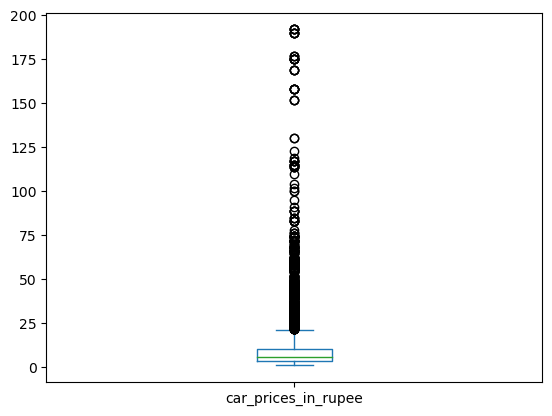

In [50]:
df["car_prices_in_rupee"].plot.box()

<Axes: >

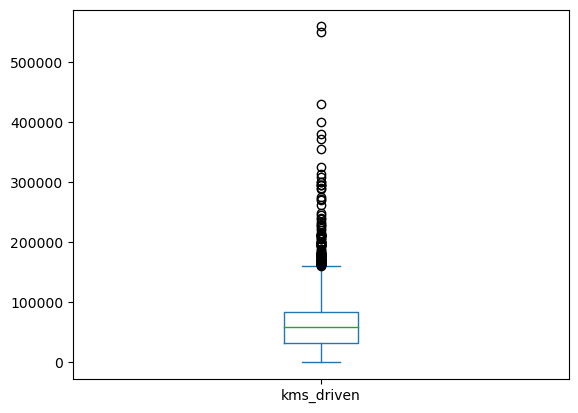

In [51]:
df["kms_driven"].plot.box()

In [52]:
# removing outliers from kms_driven
df["kms_driven"].quantile([0.8, 0.85, 0.90, 0.95, 0.97])

0.80     90000.00
0.85    100000.00
0.90    113700.60
0.95    128395.35
0.97    148871.23
Name: kms_driven, dtype: float64

In [53]:
df[df["kms_driven"]>200000].shape

(44, 10)

In [54]:
df = df[df["kms_driven"]<=200000]

In [55]:
df.shape

(5338, 10)

<Axes: >

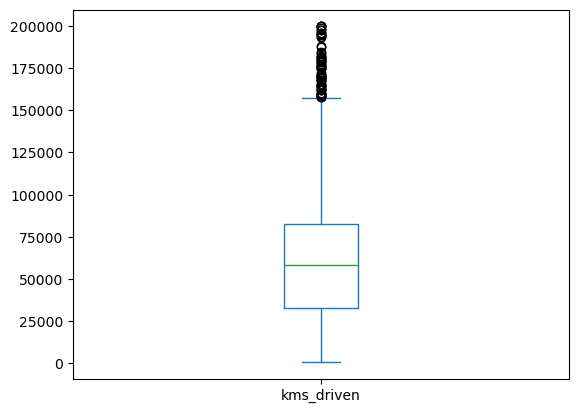

In [56]:
df["kms_driven"].plot.box()

In [57]:
df

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Other,10.03,86226,Diesel,Manual,1,2017,1956,5,Other
1,Other,12.83,13248,Petrol,Automatic,1,2021,1330,5,Renault
2,Other,16.40,60343,Petrol,Automatic,1,2016,2494,5,Toyota
3,Other,7.77,26696,Petrol,Automatic,1,2018,1199,5,Honda
4,Other,5.15,69414,Petrol,Manual,1,2016,1199,5,Other
...,...,...,...,...,...,...,...,...,...,...
5507,Other,28.90,45000,Diesel,Automatic,1,2018,2995,7,BMW
5508,Other,64.90,29000,Petrol,Automatic,2,2015,1968,5,BMW
5509,Other,13.75,90000,Diesel,Automatic,2,2013,2755,5,Other
5510,Other,29.90,79000,Diesel,Automatic,3,2015,2967,6,BMW


# data visualization

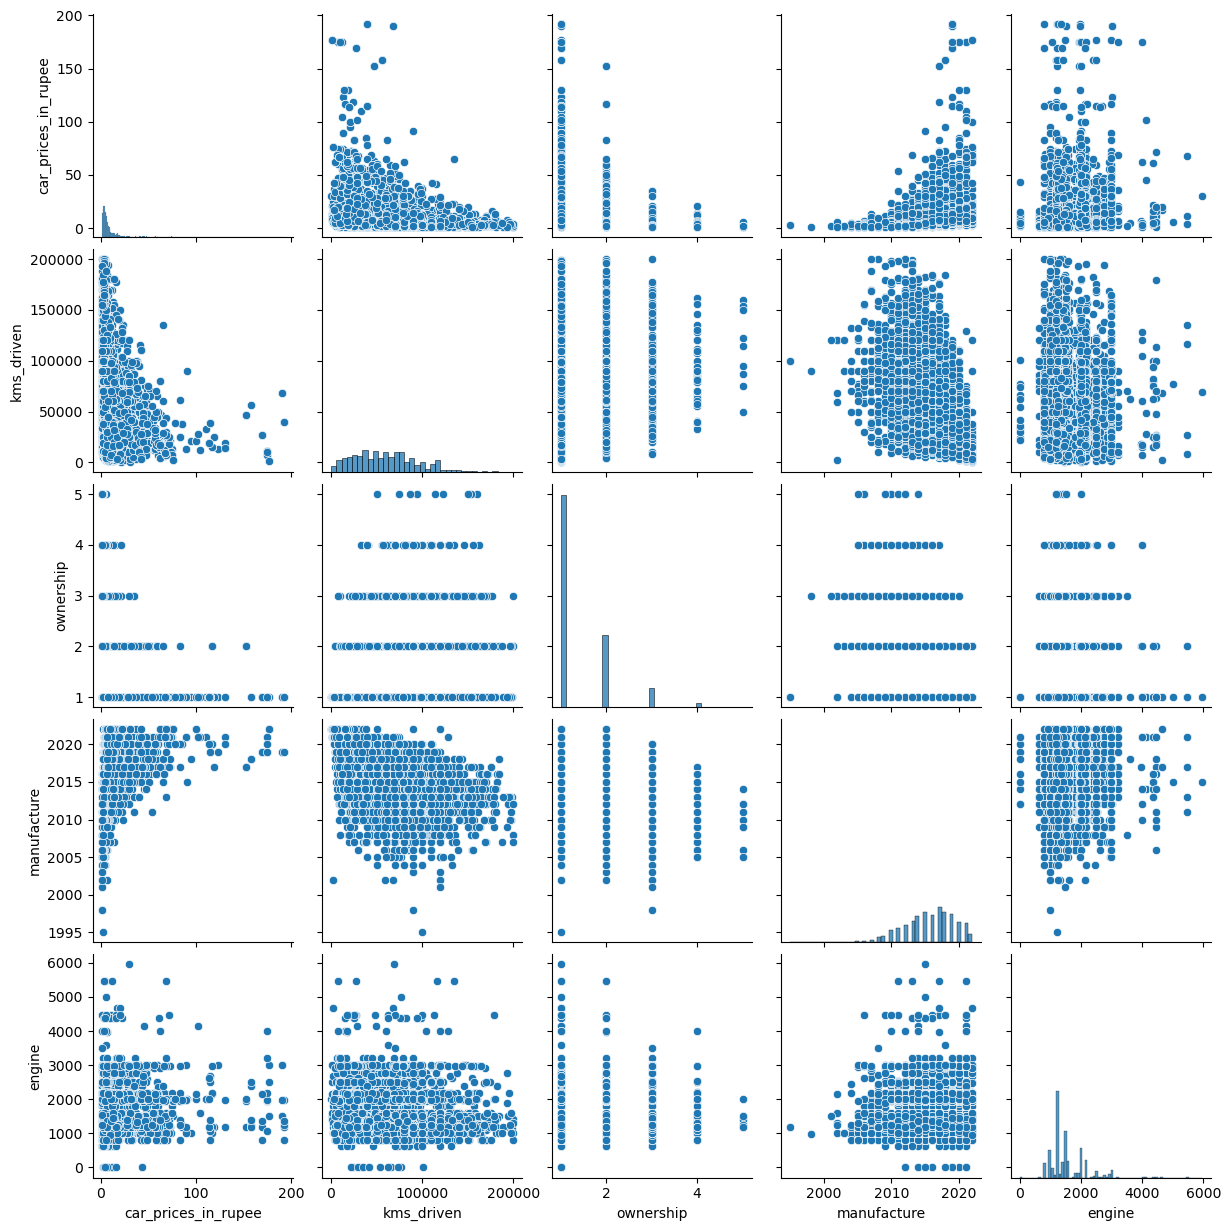

In [58]:
sns.pairplot(df)

In [59]:
df.head(2)

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Other,10.03,86226,Diesel,Manual,1,2017,1956,5,Other
1,Other,12.83,13248,Petrol,Automatic,1,2021,1330,5,Renault


<Axes: xlabel='manufacture', ylabel='car_prices_in_rupee'>

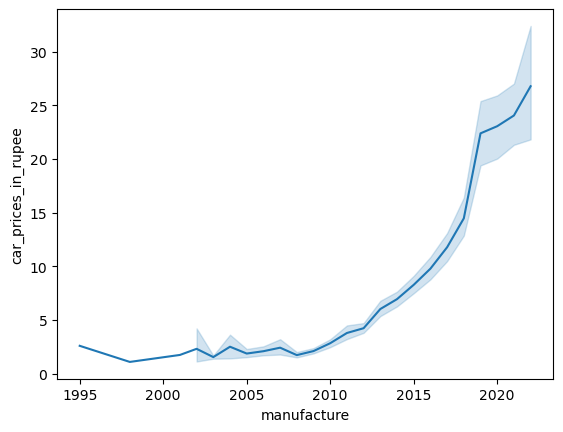

In [60]:
sns.lineplot(data = df, x = ('manufacture'), y = ('car_prices_in_rupee'))

#### price is increses by year of car model

<function matplotlib.pyplot.show(close=None, block=None)>

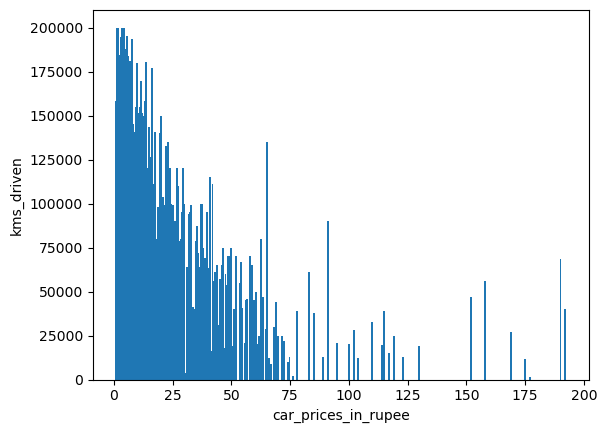

In [61]:
plt.bar(df['car_prices_in_rupee'],df['kms_driven'])
plt.xlabel('car_prices_in_rupee')
plt.ylabel('kms_driven')
plt.show

#### price drop as car kms driven is increses

<Axes: xlabel='ownership', ylabel='car_prices_in_rupee'>

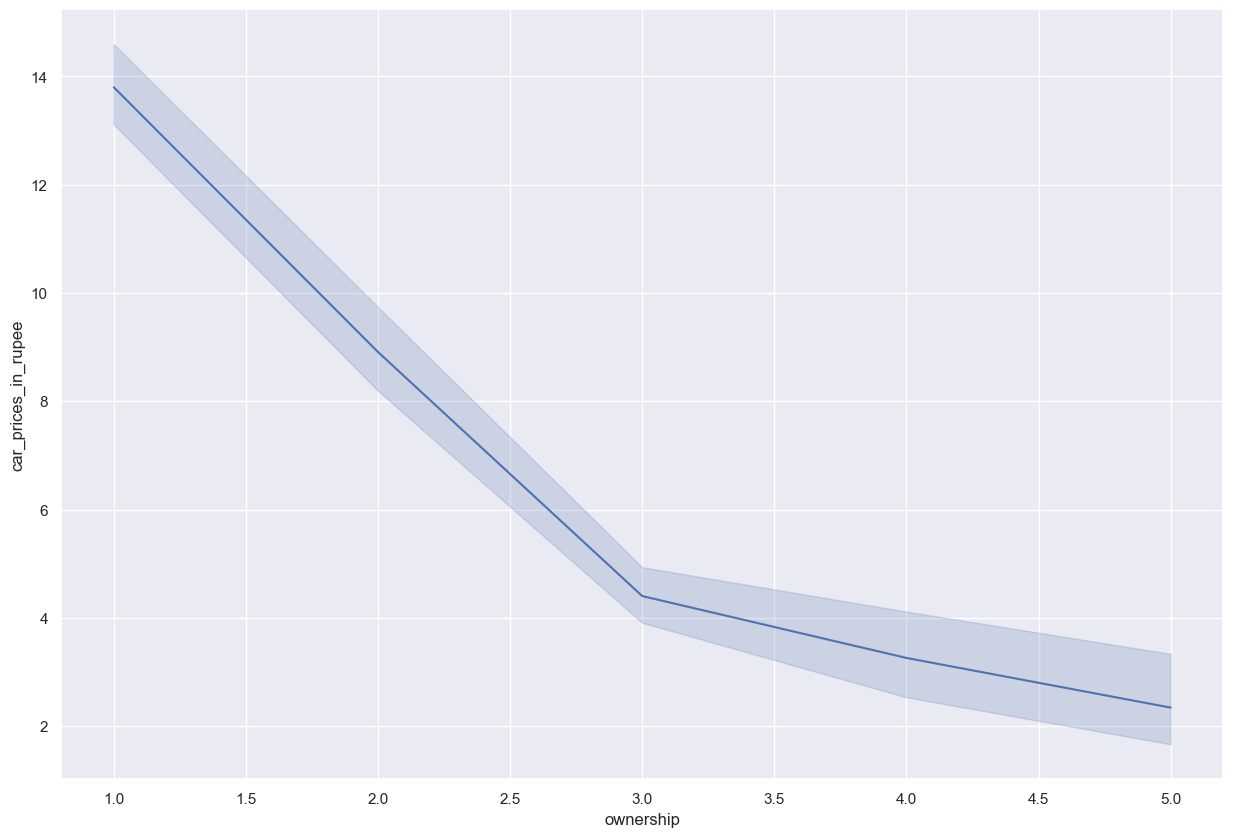

In [62]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = df, x = ('ownership'), y = ('car_prices_in_rupee'))

Text(0, 0.5, 'freq of fuel')

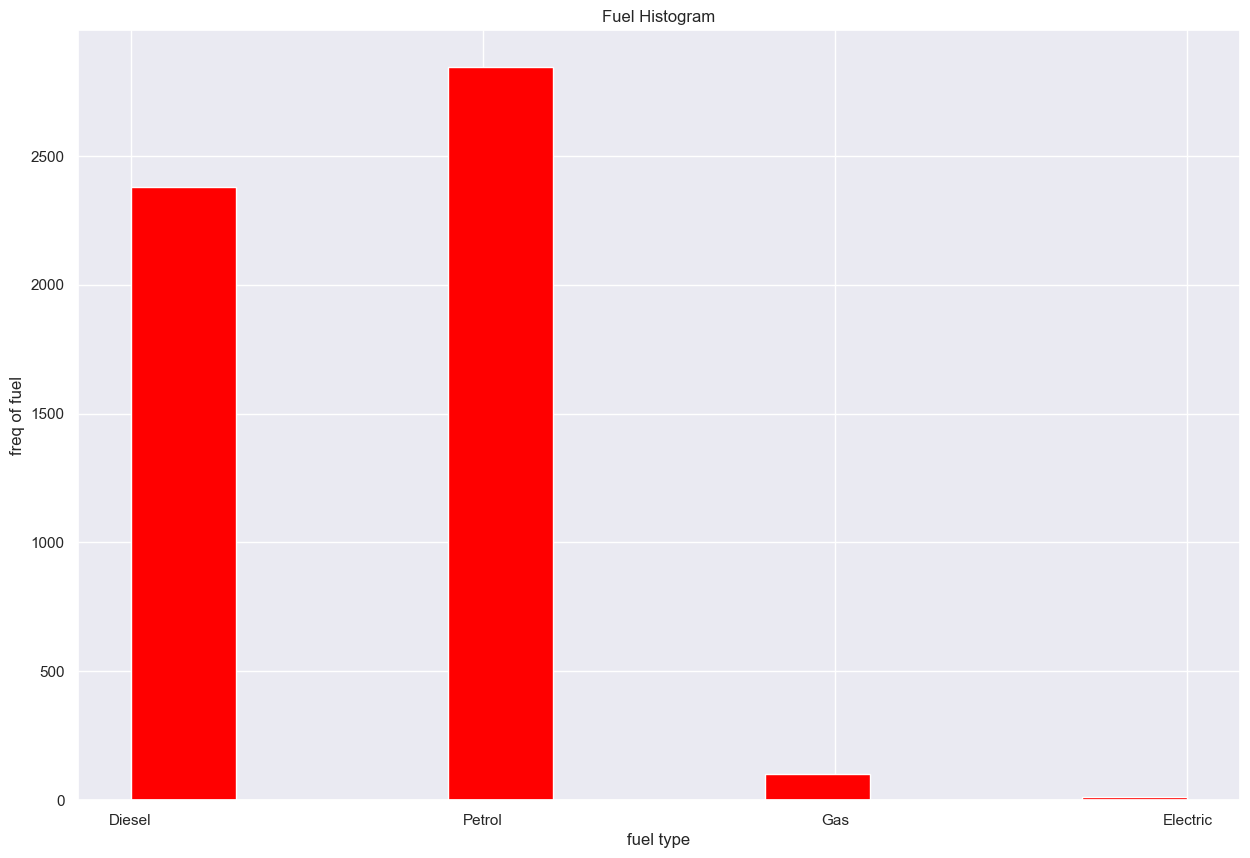

In [63]:
# car count based on fuel 
plt.hist(df['fuel_type'],color='red')
plt.title('Fuel Histogram')
plt.xlabel('fuel type')
plt.ylabel('freq of fuel')

In [64]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

#### it seem that number of diesel and petrol cars are more than gas and electric

Text(0, 0.5, 'Frequency of company')

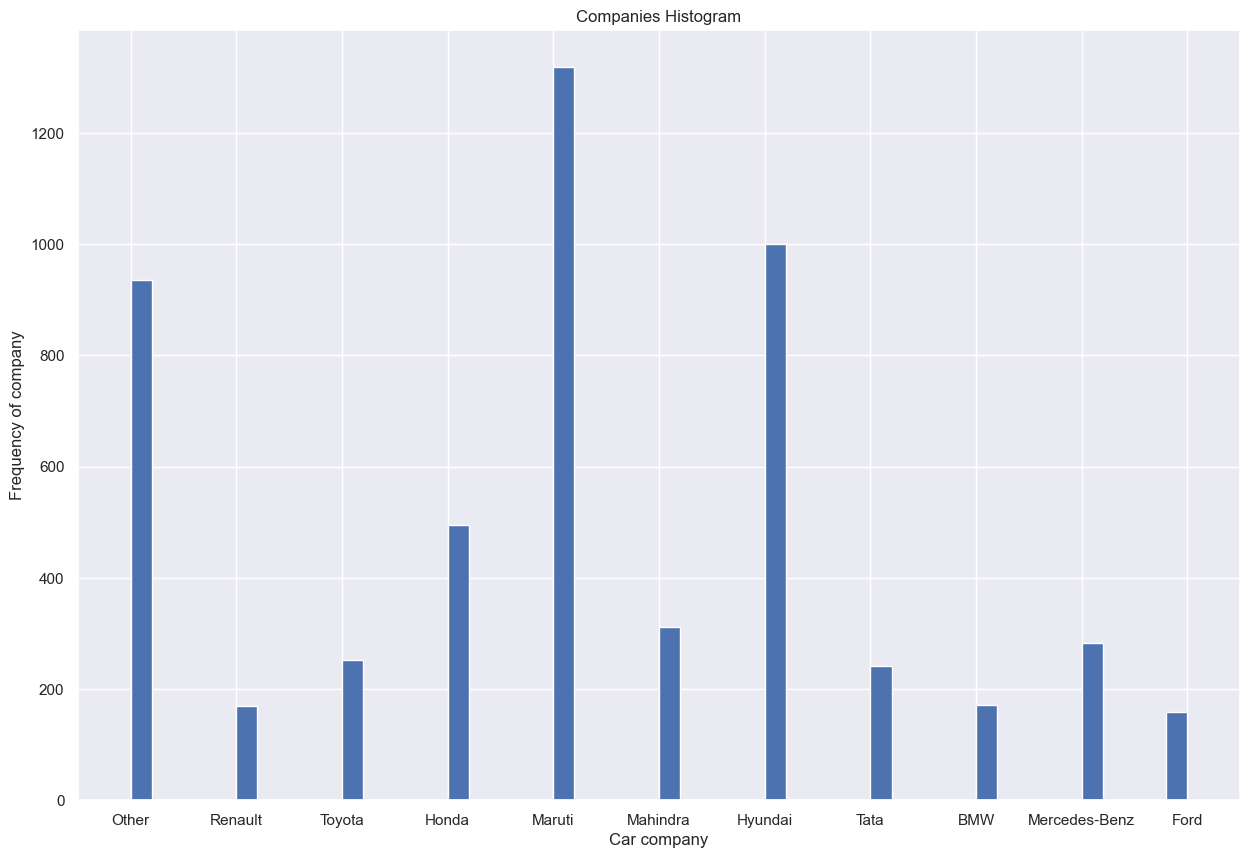

In [65]:
# car count based on car companies
plt.figure(figsize=(15,10))
plt.hist(df['manufacturer'], bins = 50)
plt.title('Companies Histogram')
plt.xlabel('Car company')
plt.ylabel('Frequency of company')

#### maruti and Hyundai are most selling car company

Text(0, 0.5, 'Frequency of Cars')

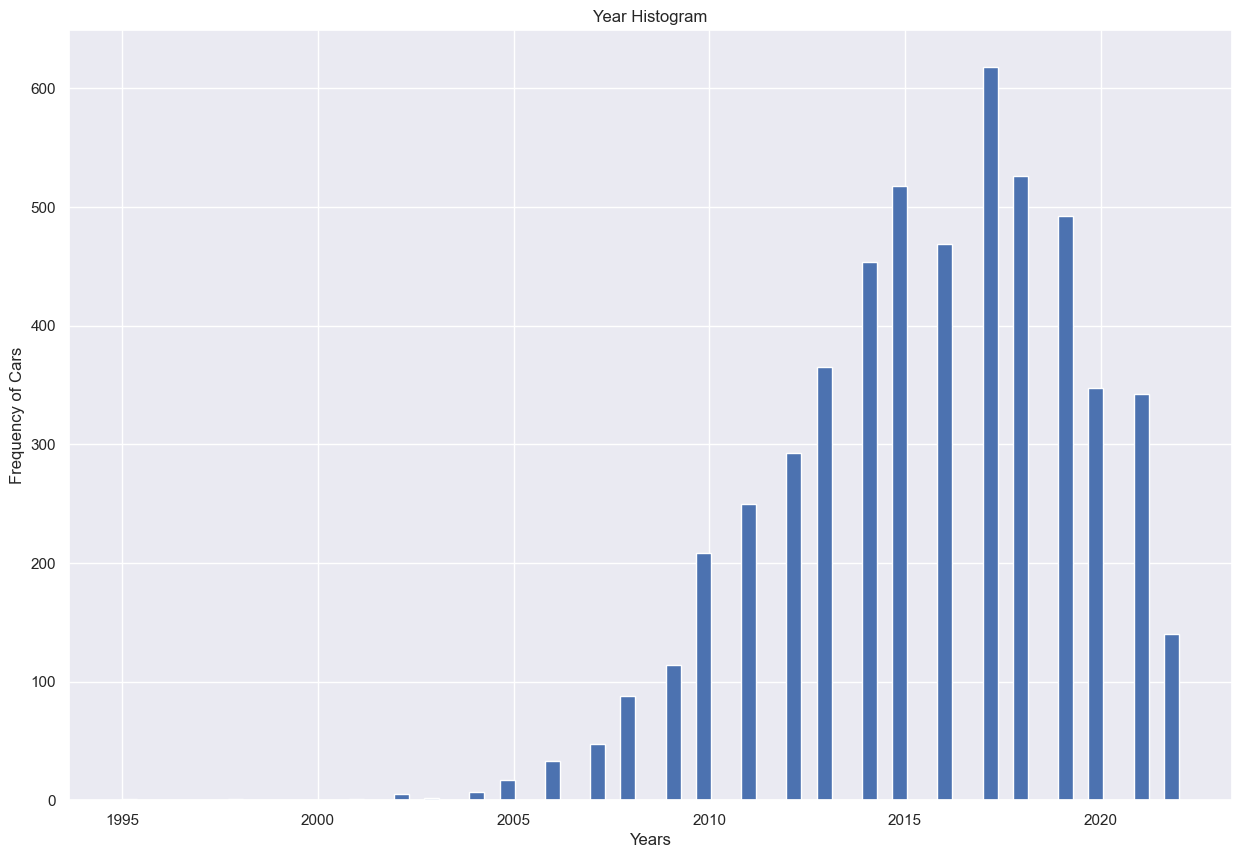

In [66]:
# cars count based on year
plt.figure(figsize=(15,10))
plt.hist(df['manufacture'], bins = 70)
plt.title('Year Histogram')
plt.xlabel('Years')
plt.ylabel('Frequency of Cars')

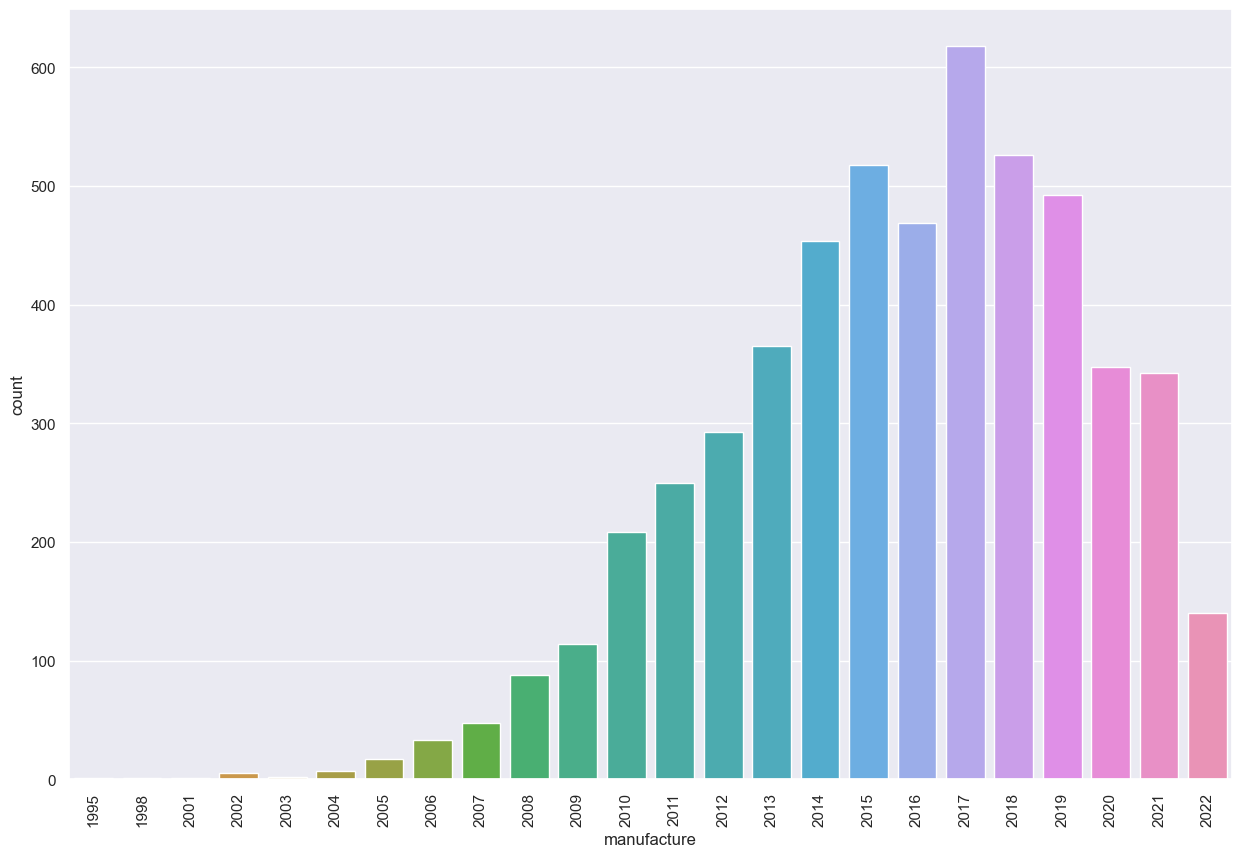

In [67]:
ax = sns.countplot(data=df, x=df['manufacture'])
ax.tick_params(axis='x', rotation=90)

#### maximum number of car models is from 2014 to 2019 

In [68]:
top_model = df['model'].value_counts().head(10)
top_model

Other    3506
Swift     384
i20       237
City      219
Wagon     193
Alto      174
Grand     152
Verna     123
Amaze     118
Creta     117
Name: model, dtype: int64

Text(0, 0.5, 'Frequency of Car models')

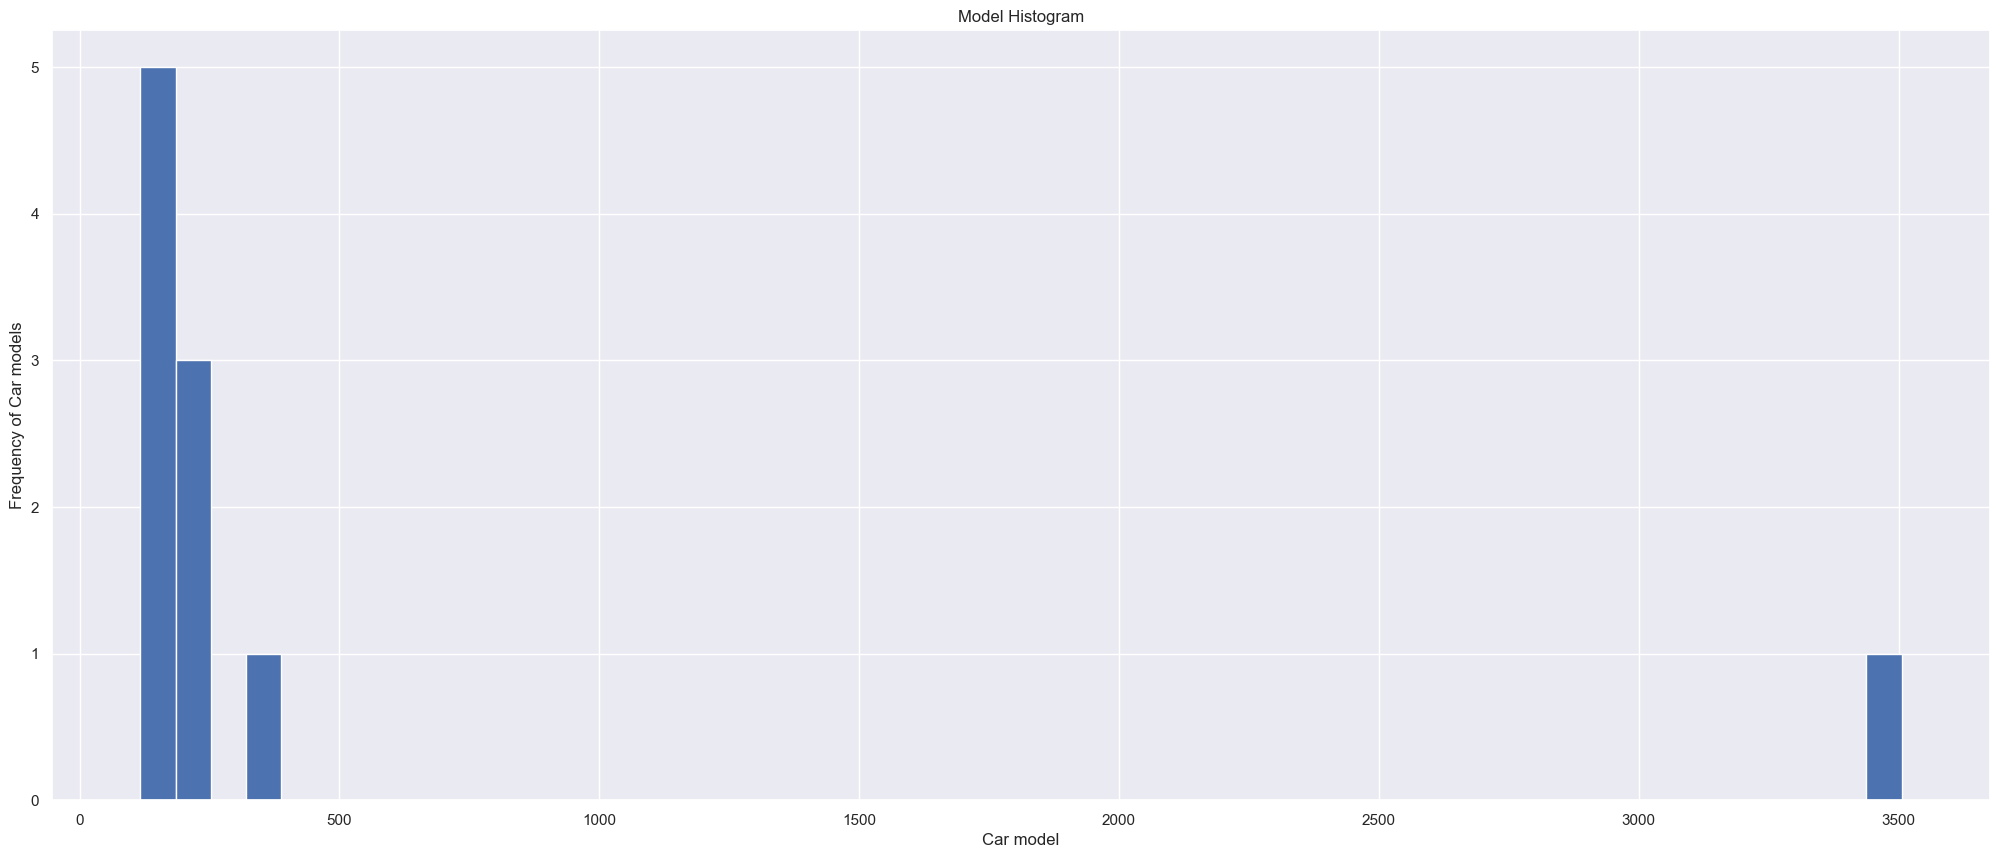

In [69]:
plt.figure(figsize=(25,10))
plt.hist(top_model, bins = 50)
plt.title('Model Histogram')
plt.xlabel('Car model')
plt.ylabel('Frequency of Car models')

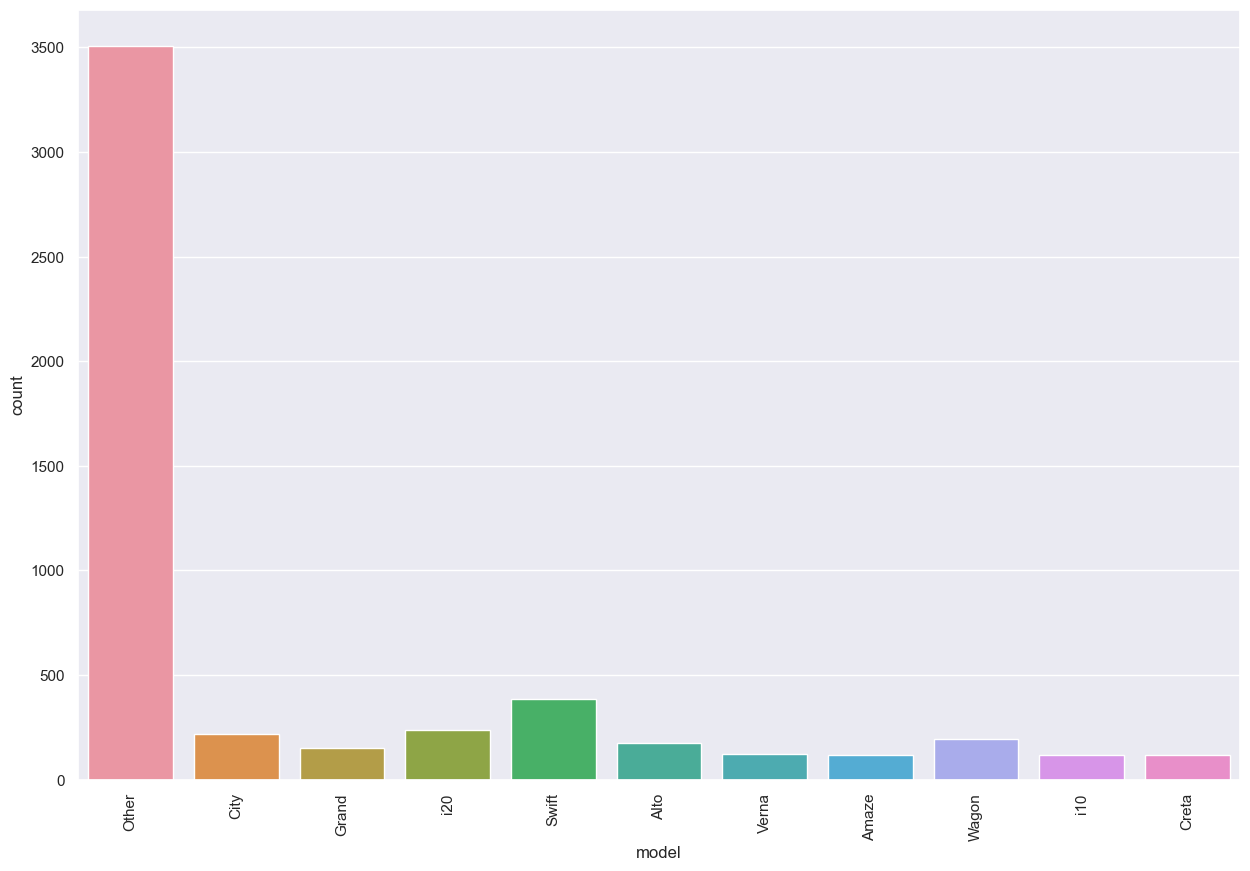

In [70]:
# car count based on manufacturer
ax = sns.countplot(data=df, x=df['model'])
ax.tick_params(axis='x', rotation=90)

Text(0, 0.5, 'Frequency of transmission')

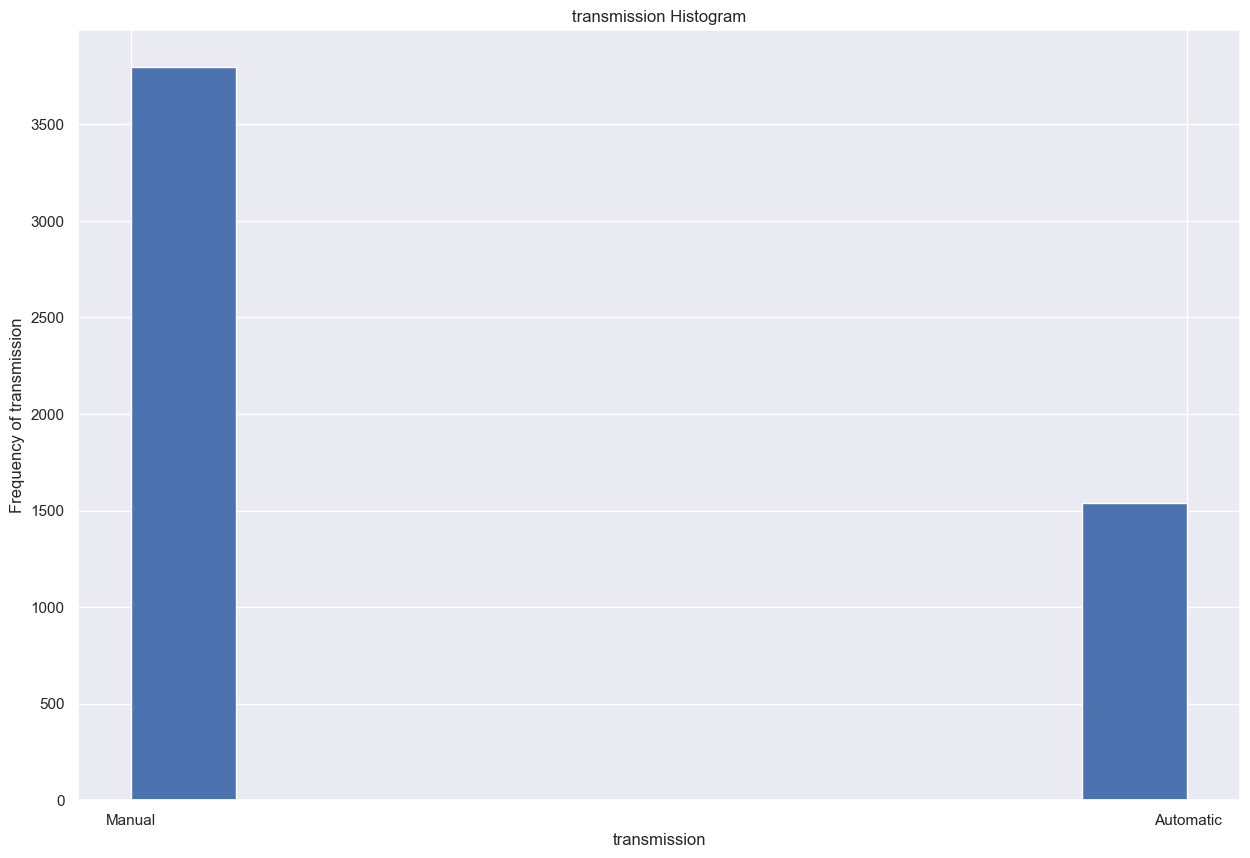

In [71]:
# distribution of cars by transmission
plt.hist(df['transmission'])
plt.title('transmission Histogram')
plt.xlabel('transmission')
plt.ylabel('Frequency of transmission')

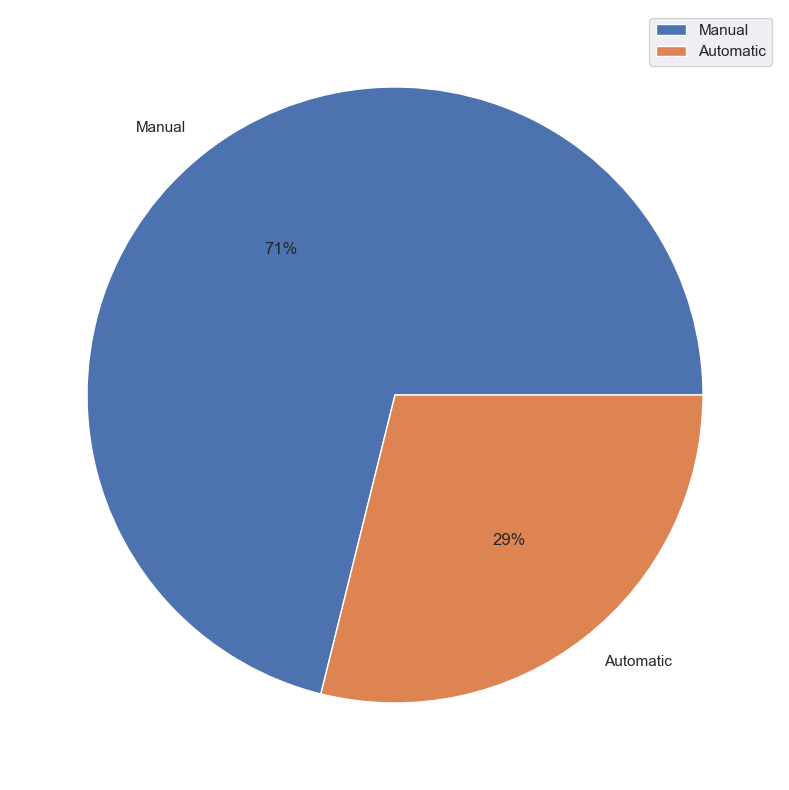

In [72]:
# distribution of cars by transmission
labels = ['Manual', 'Automatic']
plt.pie(df['transmission'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency of ownership')

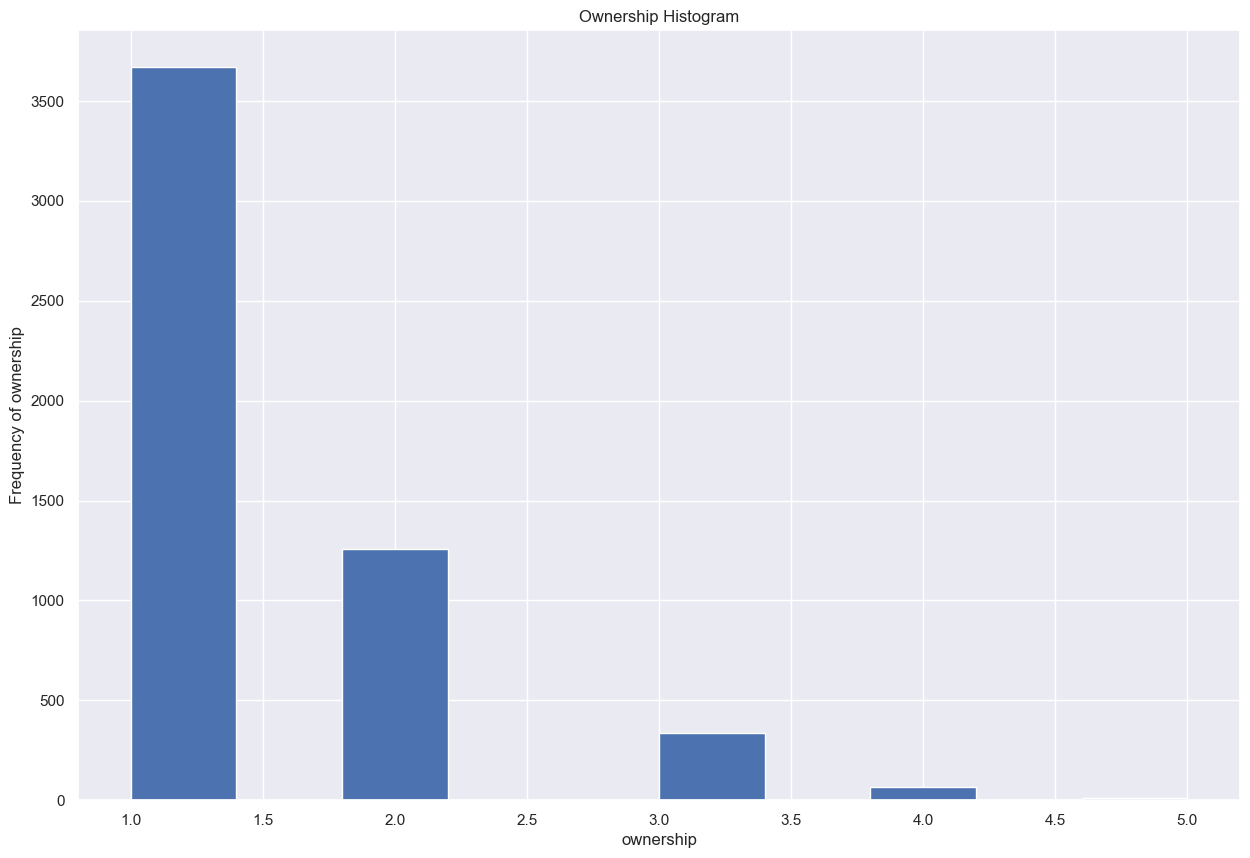

In [73]:
plt.hist(df['ownership'])
plt.title('Ownership Histogram')
plt.xlabel('ownership')
plt.ylabel('Frequency of ownership')

Text(0, 0.5, 'Frequency of Price')

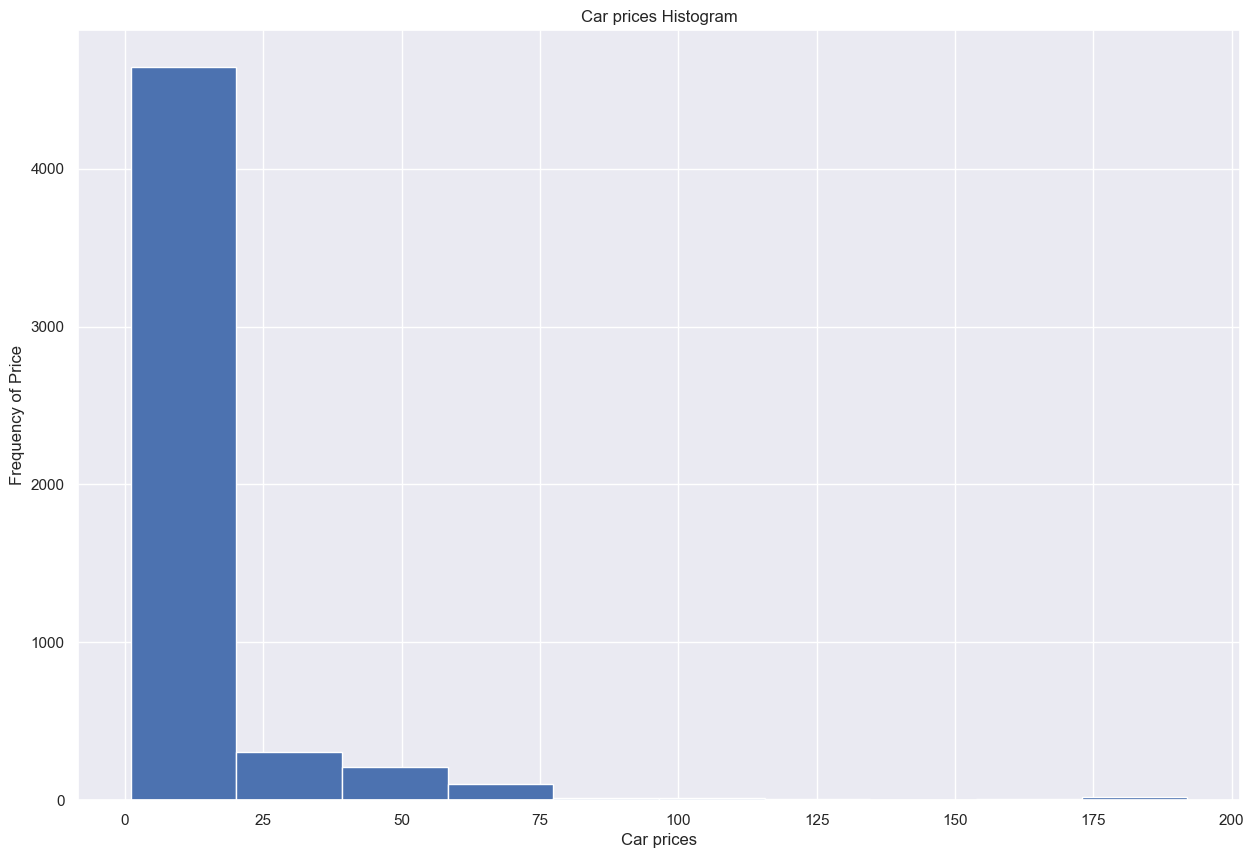

In [74]:
plt.hist(df['car_prices_in_rupee'])
plt.title('Car prices Histogram')
plt.xlabel('Car prices')
plt.ylabel('Frequency of Price')

<Axes: xlabel='car_prices_in_rupee', ylabel='Density'>

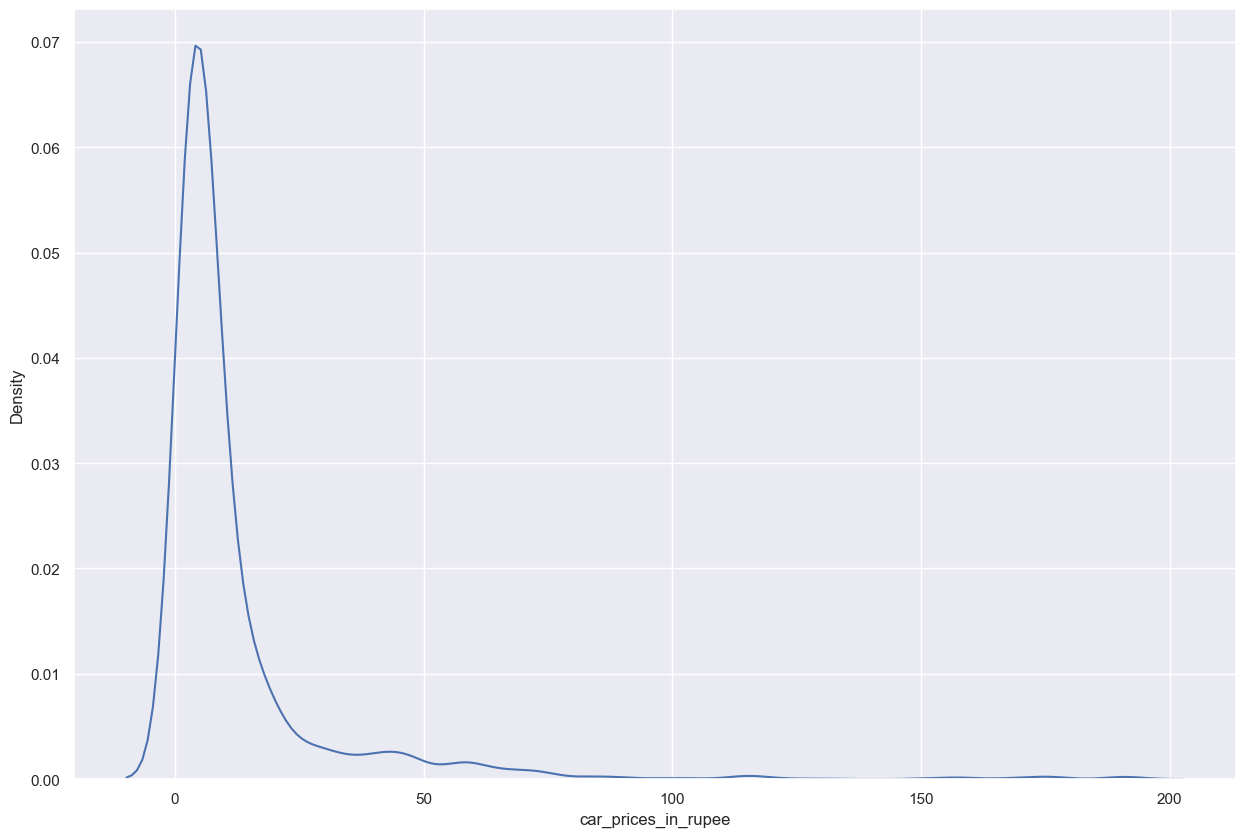

In [75]:
sns.kdeplot(df['car_prices_in_rupee'])

#### data is left skewed

# Step 3 - Data Tramsformation

In [76]:
# converting transmission column in numeric by OneHotEncoder

In [77]:
ohe = OneHotEncoder()

In [78]:
trans_dummies = pd.get_dummies(df['transmission'])
trans_dummies

,Automatic,Manual
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
5507,1,0
5508,1,0
5509,1,0
5510,1,0


In [79]:
df['transmission'] = trans_dummies['Manual']

In [80]:
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer
0,Other,10.03,86226,Diesel,1,1,2017,1956,5,Other
1,Other,12.83,13248,Petrol,0,1,2021,1330,5,Renault
2,Other,16.40,60343,Petrol,0,1,2016,2494,5,Toyota
3,Other,7.77,26696,Petrol,0,1,2018,1199,5,Honda
4,Other,5.15,69414,Petrol,1,1,2016,1199,5,Other


#### Transmission
- Manual - 1
- Automatic - 0

In [81]:
# converting fuel_type column in numeric by LabelEncoder

In [82]:
trans_dummies = pd.get_dummies(df['model'],drop_first=True)
trans_dummies

,Amaze,City,Creta,Grand,Other,Swift,Verna,Wagon,i10,i20
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5507,0,0,0,0,1,0,0,0,0,0
5508,0,0,0,0,1,0,0,0,0,0
5509,0,0,0,0,1,0,0,0,0,0
5510,0,0,0,0,1,0,0,0,0,0


In [83]:
df = pd.concat([df,trans_dummies], axis =1)

In [84]:
mnf_dummies = pd.get_dummies(df['manufacturer'],drop_first=True)
mnf_dummies

,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Other,Renault,Tata,Toyota
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5507,0,0,0,0,0,0,0,0,0,0
5508,0,0,0,0,0,0,0,0,0,0
5509,0,0,0,0,0,0,1,0,0,0
5510,0,0,0,0,0,0,0,0,0,0


In [85]:
df = pd.concat([df,mnf_dummies],axis =1)
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer,...,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Other,Renault,Tata,Toyota
0,Other,10.03,86226,Diesel,1,1,2017,1956,5,Other,...,0,0,0,0,0,0,1,0,0,0
1,Other,12.83,13248,Petrol,0,1,2021,1330,5,Renault,...,0,0,0,0,0,0,0,1,0,0
2,Other,16.40,60343,Petrol,0,1,2016,2494,5,Toyota,...,0,0,0,0,0,0,0,0,0,1
3,Other,7.77,26696,Petrol,0,1,2018,1199,5,Honda,...,0,1,0,0,0,0,0,0,0,0
4,Other,5.15,69414,Petrol,1,1,2016,1199,5,Other,...,0,0,0,0,0,0,1,0,0,0


In [86]:
fuel_dummies = pd.get_dummies(df['fuel_type'])
fuel_dummies

,Diesel,Electric,Gas,Petrol
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
5507,1,0,0,0
5508,0,0,0,1
5509,1,0,0,0
5510,1,0,0,0


In [87]:
df = pd.concat([df,fuel_dummies],axis =1)
df.head()

,model,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer,...,Maruti,Mercedes-Benz,Other,Renault,Tata,Toyota,Diesel,Electric,Gas,Petrol
0,Other,10.03,86226,Diesel,1,1,2017,1956,5,Other,...,0,0,1,0,0,0,1,0,0,0
1,Other,12.83,13248,Petrol,0,1,2021,1330,5,Renault,...,0,0,0,1,0,0,0,0,0,1
2,Other,16.40,60343,Petrol,0,1,2016,2494,5,Toyota,...,0,0,0,0,0,1,0,0,0,1
3,Other,7.77,26696,Petrol,0,1,2018,1199,5,Honda,...,0,0,0,0,0,0,0,0,0,1
4,Other,5.15,69414,Petrol,1,1,2016,1199,5,Other,...,0,0,1,0,0,0,0,0,0,1


In [88]:
df = df.drop(['model','fuel_type','manufacturer'],axis =1)
df.head()

,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Amaze,City,Creta,...,Maruti,Mercedes-Benz,Other,Renault,Tata,Toyota,Diesel,Electric,Gas,Petrol
0,10.03,86226,1,1,2017,1956,5,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,12.83,13248,0,1,2021,1330,5,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,16.40,60343,0,1,2016,2494,5,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,7.77,26696,0,1,2018,1199,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.15,69414,1,1,2016,1199,5,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5338 entries, 0 to 5511
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_prices_in_rupee  5338 non-null   float64
 1   kms_driven           5338 non-null   int64  
 2   transmission         5338 non-null   uint8  
 3   ownership            5338 non-null   int64  
 4   manufacture          5338 non-null   int64  
 5   engine               5338 non-null   int64  
 6   Seats                5338 non-null   object 
 7   Amaze                5338 non-null   uint8  
 8   City                 5338 non-null   uint8  
 9   Creta                5338 non-null   uint8  
 10  Grand                5338 non-null   uint8  
 11  Other                5338 non-null   uint8  
 12  Swift                5338 non-null   uint8  
 13  Verna                5338 non-null   uint8  
 14  Wagon                5338 non-null   uint8  
 15  i10                  5338 non-null   u

In [90]:
df["Seats"] = df["Seats"].astype('int32')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5338 entries, 0 to 5511
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_prices_in_rupee  5338 non-null   float64
 1   kms_driven           5338 non-null   int64  
 2   transmission         5338 non-null   uint8  
 3   ownership            5338 non-null   int64  
 4   manufacture          5338 non-null   int64  
 5   engine               5338 non-null   int64  
 6   Seats                5338 non-null   int32  
 7   Amaze                5338 non-null   uint8  
 8   City                 5338 non-null   uint8  
 9   Creta                5338 non-null   uint8  
 10  Grand                5338 non-null   uint8  
 11  Other                5338 non-null   uint8  
 12  Swift                5338 non-null   uint8  
 13  Verna                5338 non-null   uint8  
 14  Wagon                5338 non-null   uint8  
 15  i10                  5338 non-null   u

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
A = df[['car_prices_in_rupee','kms_driven','manufacture','engine','Seats']]
scaler = StandardScaler().fit_transform(A)
scaler

array([[-0.09408473,  0.6879775 ,  0.35965576,  0.72482889, -0.34844581],
       [ 0.04657957, -1.31583465,  1.43806746, -0.35204575, -0.34844581],
       [ 0.22592655, -0.02271161,  0.09005283,  1.6503218 , -0.34844581],
       ...,
       [ 0.09279784,  0.79160307, -0.71875595,  2.09930628, -0.34844581],
       [ 0.90412941,  0.48956775, -0.17955009,  2.46399865,  1.04273124],
       [ 1.00460391, -0.52636923,  0.35965576,  0.78503754, -0.34844581]])

In [112]:
df.head()

,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Amaze,City,Creta,...,Maruti,Mercedes-Benz,Other,Renault,Tata,Toyota,Diesel,Electric,Gas,Petrol
0,10.03,86226,1,1,2017,1956,5,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,12.83,13248,0,1,2021,1330,5,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,16.40,60343,0,1,2016,2494,5,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,7.77,26696,0,1,2018,1199,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.15,69414,1,1,2016,1199,5,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [113]:
new_df = df.copy()

In [114]:
new_df[['car_prices_in_rupee','kms_driven','manufacture','engine','Seats']] = scaler

In [116]:
new_df.head()

,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Amaze,City,Creta,...,Maruti,Mercedes-Benz,Other,Renault,Tata,Toyota,Diesel,Electric,Gas,Petrol
0,-0.094085,0.687978,1,1,0.359656,0.724829,-0.348446,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.046580,-1.315835,0,1,1.438067,-0.352046,-0.348446,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.225927,-0.022712,0,1,0.090053,1.650322,-0.348446,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,-0.207621,-0.946583,0,1,0.629259,-0.577398,-0.348446,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.339243,0.226358,1,1,0.090053,-0.577398,-0.348446,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# step 4 - Model Traning

In [117]:
# Separate features (X) and target variable (y)
X = new_df.drop("car_prices_in_rupee", axis=1)
y = new_df['car_prices_in_rupee']

In [118]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
rfr = RandomForestRegressor()

In [120]:
model = rfr.fit(X_train,y_train)
model

RandomForestRegressor()

In [121]:
predictions = model.predict(X_test)
predictions

array([0.08922094, 0.42326851, 1.97746833, ..., 2.31139533, 6.78340976,
       0.64756276])

In [122]:
model.score(X_train, y_train)

0.9559178938131938

In [123]:
model.score(X_test, y_test)

0.7756856091502544

In [124]:
r2_score(y_test, predictions)

0.7756856091502544

In [125]:
mean_squared_error(y_test, predictions)

0.23515747529619935

In [126]:
mean_absolute_error(y_test, predictions)

0.18607712420303396

In [127]:
df_test_with_predictions = X_test.copy()
df_test_with_predictions['predicted_price'] = predictions

In [128]:
df_test_with_predictions

,kms_driven,transmission,ownership,manufacture,engine,Seats,Amaze,City,Creta,Grand,...,Mercedes-Benz,Other,Renault,Tata,Toyota,Diesel,Electric,Gas,Petrol,predicted_price
3481,-1.605184,0,1,1.707670,-0.126693,-0.348446,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.089221
1982,0.297363,0,2,-0.988359,1.658923,2.433908,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.423269
5507,-0.443996,0,1,0.629259,2.512166,2.433908,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.977468
4389,0.459254,1,2,-0.988359,1.046515,-0.348446,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.496324
168,-0.004672,1,1,-1.527565,-1.270658,-0.348446,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.523513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710,0.105901,1,2,-0.449153,-0.577398,-0.348446,1,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.439667
650,-0.855862,0,2,-0.179550,0.096939,-0.348446,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.581898
4140,-0.993151,0,1,1.168465,-1.270658,-0.348446,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.311395
4077,0.201261,0,1,0.898862,0.745472,-0.348446,0,0,0,0,...,0,1,0,0,0,1,0,0,0,6.783410


# Traning model- 2

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr = LinearRegression()

In [132]:
model2 = lr.fit(X_train,y_train)
model2

LinearRegression()

In [133]:
model2.score(X_train, y_train)

0.4517694813204831

In [134]:
model2.score(X_test, y_test)

0.4303811645749789